<h1 align="center">Computational Linear Algebra, Demo 3</h1>

<br>

In [2]:
import numpy as np
import sympy as sp
import scipy
import matplotlib.pyplot as plt

<h3 align="left">Tehtävä 1</h3>

Määritä Pythonin avulla matriisin A ominaisarvot ja ominaisvektorit. Syötä ominaisarvoista koostuva (numpy)vektori muuttujaan x ja näitä vastaavat ominaisvektorit muuttuujiin v0, v1, v2.

$$ A = \begin{bmatrix}
        1 & 0 & -1\\
        2 & 3 & 0\\
        -1 & 4 & 2
        \end{bmatrix} $$

- NumPy:ssä on valmiina funktio, jotka laskee annetun matriisin ominaisarvot ja -vektorit.

In [17]:
A = np.array([[1, 0, -1], [2, 3, 0], [-1, 4, 2]])
A

array([[ 1,  0, -1],
       [ 2,  3,  0],
       [-1,  4,  2]])

In [93]:
np.linalg.eigvals(A)

array([-0.39842816+0.j        ,  3.19921408+1.52129656j,
        3.19921408-1.52129656j])

- Palauttaa ainoastaan matriisin A ominaisarvot.
- On kuitenkin olemassa myös funktio, joka palauttaa sekä ominaisarvot ja ominaisvektorit. Käytetään sitä!

In [94]:
np.linalg.eig(A)

(array([-0.39842816+0.j        ,  3.19921408+1.52129656j,
         3.19921408-1.52129656j]),
 array([[-0.55031996+0.j        ,  0.26203981-0.18126487j,
          0.26203981+0.18126487j],
        [ 0.32386735+0.j        , -0.18993442-0.36936731j,
         -0.18993442+0.36936731j],
        [-0.76958293+0.j        , -0.85203925+0.j        ,
         -0.85203925-0.j        ]]))

Palauttaa tuplen, jossa... 
- ensimmäisessä paikassa on vektori, jonka alkiot ovat anneutn matriisin A ominaisarvot.
- toisessa paikassa on matriisi, jonka **sarakkeina** ovat matriisin A ominaisarvoja vastaavat normitetut ominaisvektorit.

In [95]:
x = np.linalg.eig(A)[0]

In [96]:
P = np.linalg.eig(A)[1]

In [97]:
print(P)

[[-0.55031996+0.j          0.26203981-0.18126487j  0.26203981+0.18126487j]
 [ 0.32386735+0.j         -0.18993442-0.36936731j -0.18993442+0.36936731j]
 [-0.76958293+0.j         -0.85203925+0.j         -0.85203925-0.j        ]]


- Huomaa, että ominaisvektorit ovat matriisin P **sarakkeina**!!

In [98]:
v0 = P[:, 0]
v0

array([-0.55031996+0.j,  0.32386735+0.j, -0.76958293+0.j])

In [99]:
v1 = P[:, 1]
v1

array([ 0.26203981-0.18126487j, -0.18993442-0.36936731j,
       -0.85203925+0.j        ])

In [100]:
v2 = P[:, 2]
v2

array([ 0.26203981+0.18126487j, -0.18993442+0.36936731j,
       -0.85203925-0.j        ])

<br>

<br>

<h3 align="left">Tehtävä 2</h3>

Tee tämä tehtävä ilman NumPyn ominaisarvoihin liittyviä funktioita.

Kirjoita alle funktio onko_ominaisarvo(A,r) jonka parametrit ovat matriisi A ja luku r. Funktion tulee testata onko luku r matriisin A ominaisarvo vai ei. Eli funktion tulee palauttaa 1 jos näin on ja 0 ellei näin ole.

Alla linkki NumPyn taulukoihin liittyvistä vertailutavoista (jota ei tässä tehtävässä tarvinnut, mutta hyödyllinen linkki muuten).
- https://numpy.org/doc/stable/reference/routines.logic.html#comparison

Alla linkki SymPyn matriisi-dokumentaatioon. Todella hyödyllinen linkki. Etsi esim. charpoly() -funktio.
- https://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html

In [7]:
def onko_ominaisarvo(A, r):
    
    """" Funktio tarkistaa, onko luku r annetun matriisin ominaisarvo 
    laskemalla matriisin A-λI karakteristisen polynomin det(A-λI). 
    λ (eli r) on matriisin A ominaisarvo jos ja vain jos det(A-λI) = 0. """
    
    A_sympy = sp.Matrix(A)
    char_poly = A_sympy.charpoly()
    
    if char_poly(r) == 0:
        print(f"{r} on matriisin A ominaisarvo")
        return 1
    else:
        print(f"{r} ei ole matriisin A ominaisarvo")
        return 0

In [8]:
B = np.array([[4, 8, 3], [0, -1, 0], [0, -2, 2]])
B

array([[ 4,  8,  3],
       [ 0, -1,  0],
       [ 0, -2,  2]])

In [9]:
# Matriisin ominaisarvot
np.linalg.eigvals(B)

array([ 4.,  2., -1.])

In [10]:
onko_ominaisarvo(B, 4)

4 on matriisin A ominaisarvo


1

In [11]:
onko_ominaisarvo(B, 5)

5 ei ole matriisin A ominaisarvo


0

Determinantti $ det(\lambda I - A) $ on astetta n olevan muttujan $ \lambda $ polynomi, ja sitä sanotaan **karakteristiseksi polynomiksi**.

Yhtälöä $ det(\lambda I - A) = 0 $ puolestaan sanotaan **karakteristiseksi yhtälöksi.**

Olkoon A n x n -matriisi. Luku $ \mathbf{\lambda} $ on matriisin A ominaisarvo jos ja vain jos

$$ det(\lambda I - A) = 0 $$

In [23]:
A = np.array([[1, 0, -1], [2, 3, 0], [-1, 4, 2]])

In [18]:
A_sympy = sp.Matrix(A)

In [26]:
cp = A_sympy.charpoly()
cp

PurePoly(lambda**3 - 6*lambda**2 + 10*lambda + 5, lambda, domain='ZZ')

In [27]:
type(cp)

sympy.polys.polytools.PurePoly

- charpoly() -funktio palauttaa muuttujan $ \mathbf{\lambda} $ **karakteristisen polynomin.**
- Huomaa, että funktion sisään voidaan laittaa mikä tahansa reaaliluku, jolloin funktio laskee karakteristisen polynomin arvon ko. arvolla.

In [21]:
# Yllä olevan karakteristisen polynomin arvo, kun lambda=5.
5**3 - 6 * 5**2 + 10*5 + 5

30

In [28]:
# Sama arvo saadaan, kun syötetään lambda=5 argumentiksi cp-muuttujalle, 
# joka on sympyn PurePoly-objekti.
cp(5)

30

<br>

<br>

<h3 align="left">Tehtävä 3</h3>

Brittiläisen tilastotieteilijän ja biologin Ronald Fisherin luoma data kokoelma nimeltä "Iris dataset" sisältää Iris kukkien verho- ja terälehtien pituuksia ja leveyksiä. Tämä datasetti on ehkä eniten käytetty esimerkki datan käsittelyssä, etenkin koneoppimisen saralla. Tämän tehtävän tarkoituksena on tutkia osaa Iris datasta ja etsiä siihen sopiva uusi koordinaatisto, missä koordinaatiston akselisuunnat ovat sellaiset, että niiden suhteen datan muuttujien välinen korrelaatio olisi mahdollisimman pieni.

In [62]:
from sklearn import datasets

In [63]:
iris = datasets.load_iris()

In [76]:
X = iris.data[:,2] # Terälehtien pituudet
y = iris.data[:,3] # Terälehtien leveydet

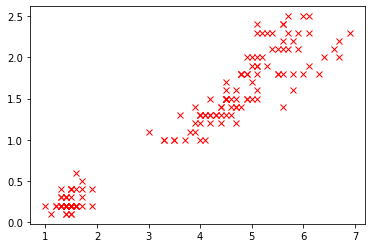

In [77]:
plt.plot(X,y,'rx'); # Piirretään datapisteet

**Tehtävät**

- Sovita annettuun dataan PNS-suora ja tallenna suoraan liittyvät termit (kulmakerroin ja vakiotermi) muuttujiin alpha_1 ja beta_1.

- Sovita dataan PNS-mielessä suora, joka on kohtisuorassa edellä määriteltyä suoraa vastaan. Tallenna tämän suoran kulmakerroin ja vakiotermi muuttujiin alpha_2 ja beta_2.

- Piirrä suorat yllä olevaan kuvaan.

PNS-ratkaisu saadaan normaaliyhtälön avulla (kun $\, A^T A \,$ on kääntyvä)

\begin{align*}
    A^T A \bar{x} &= A^T \bar{b} \\
    \bar{x} &= (A^T A)^{-1} A^T \bar{b}
\end{align*}

In [78]:
unos = np.ones(len(X))

In [79]:
X_design = np.zeros((len(X), 2))

In [80]:
X_design[:, 0] = unos

In [81]:
X_design[:, 1] = X

In [92]:
alpha1, beta1 = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

In [93]:
print(alpha1)
print(beta1)

-0.36307552131903387
0.4157554163524128


- Tarkistetaan, että saatiin oikeat kertoimet sovittamalla lineaarinen regressiomalli sklearnin avulla.

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
model = LinearRegression().fit(X_design, y)

In [95]:
print(model.intercept_)
print(model.coef_[1])

-0.3630755213190304
0.41575541635241164


<br>

**Kohtisuora PNS-suora (TLS, Total Least Squares)**

Ks. Cross Validated -sivuston selitys TLS:stä. Muun muassa ero OLS:iin ja kuinka laskea TLS:stä kulmakerroin ja intercept (vakiotermi).
- https://stats.stackexchange.com/questions/13152/how-to-perform-orthogonal-regression-total-least-squares-via-pca#:~:text=OLS%20fits%20the%20equation%20y,component%20of%20the%202D%20data.

Nyt halutaan siis suora, joka on ortogonaalinen (kohtisuorassa) edellisessä kohdassa määritettyyn suoraan nähden. 
- Tämän ortogonaalisen suoran kulmakerroin saadaan yksinkertaisesti ottamalla aiemman PNS-suoran negatiivinen käänteisluku.
- Jo lukiosta muistetaan, että kahden ortogonaalisen suoran kulmakertoimien tulo on -1.

In [103]:
beta2 = -1/PNS[1]
beta2

-2.405260306103518

In [102]:
np.round(beta2 * beta1, 10)

-1.0

- Kuten nähdään, kulmakertoimien tulo on -1.

Intercept (vakiotermi) puolestaan saadaan ratkaistua regressiosuoran yhtälöstä. 

In [104]:
alpha2 = np.mean(y) - beta*np.mean(X)
alpha2

10.238301563670355

Piirretään vielä suorat datasetin kuvaan.

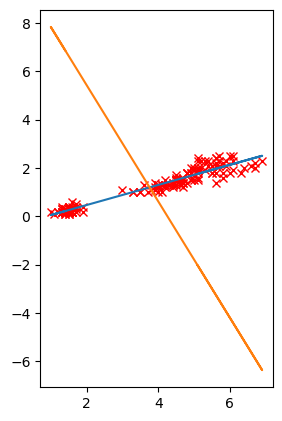

In [107]:
plt.figure(figsize=(3, 5), dpi=100)

plt.plot(X,y,'rx')
plt.plot(X, alpha1 + X*beta1)
plt.plot(X, alpha2 + X*beta2);

<br>

<br>

<h3 align="left">Tehtävä 4 (jatkoa edelliseen tehtävään)</h3>

Tehdään vastaavanlaisen koordinaatiston metsästys käyttäen apuna diagonalisointia sopivalle symmetriselle matriisille.

- Muokkaa annettua dataa sillä tavalla, että origo on x-arvojen ja y-arvojen keskiarvossa.

- Muodosta kovarianssimatriisi, joka koodaa tiedon siitä miten x ja y datapisteet muuttuvat suhteessa toisiinsa.

$$ A = \begin{bmatrix}
    Cov(x, x) & Cov(x, y)\\
    Cov(y, x) & Cov(y, y)
\end{bmatrix}. $$

- Diagonalisoi tämä matriisi sekä syötä tarvittavat tiedot ominaisvektoreista.

In [110]:
X = iris.data[:,2] # Terälehtien pituudet
y = iris.data[:,3] # Terälehtien leveydet

In [111]:
# Keskistys

X_centered = X - np.mean(X)
y_centered = y - np.mean(y)

In [112]:
cov_matrix = np.cov(X_centered, y_centered)
cov_matrix

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

- Huomaa, että tässä ei ole väliä syöttääkö keskistetyt vai alkuperäiset X:n ja y:n taulukot. Kovarianssi joka tapauksessa on sama.

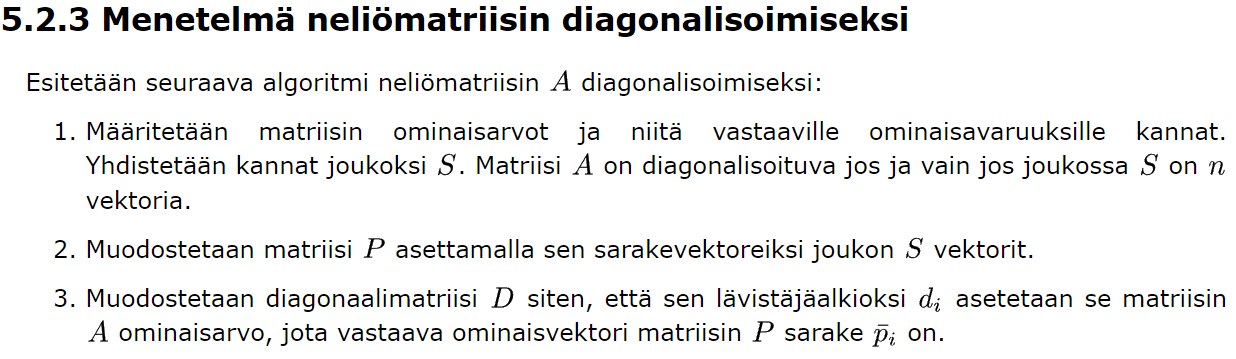

In [113]:
# Kovarianssimatriisin ominaisarvot ja -vektorit.
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [114]:
eigenvalues

array([3.66123805, 0.03604607])

In [115]:
eigenvectors

array([[ 0.92177769, -0.38771882],
       [ 0.38771882,  0.92177769]])

- Huomaa, että ominaisarvoa i vastaava ominaisvektori on **sarakevektorina**. 
- Huomaa myös, että ominaisvektorit ovat **normitettu**.

In [116]:
# Muodostetaan diagonaalimatriisi D ominaisarvoista.
D = np.diag(eigenvalues)

In [117]:
# Muodostetaan matriisi P, jossa sarakkeina ovat ominaisarovja vastaavat ominaisvektorit.
P2 = eigenvectors

Tarkistetaan, menikö homma putkeen. Jos meni, niin $ A = PDP^-1 $.

In [120]:
P2 @ D @ np.linalg.inv(P2)

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [119]:
cov_matrix

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

- Putkeen meni!

<br>

Jos haluttaisiin esim. palauttaa pienempää ominaisarvoa vastaava ominaisvektori, se voitaisiin tehdä seuraavasti.

In [141]:
eigenvalues

array([3.66123805, 0.03604607])

In [142]:
eigenvectors

array([[ 0.92177769, -0.38771882],
       [ 0.38771882,  0.92177769]])

In [124]:
eigv1 = eigenvectors[:, np.argmin(eigenvalues)]
eigv1

array([-0.38771882,  0.92177769])

In [122]:
# Lasketaan seuraavaksi pienempää ominaisarvoa vastaavan suoran kulmakerroin.
alpha1 = eigv1[1] / eigv1[0]
alpha1

-2.3774385946736496

Tässä linkissä näytetään, kuinka kulmakerroin saadaan laskettua ominaisvektorin avulla.
- https://stats.stackexchange.com/questions/13152/how-to-perform-orthogonal-regression-total-least-squares-via-pca#:~:text=OLS%20fits%20the%20equation%20y,component%20of%20the%202D%20data.

<br>

<br>

<h3 align="left">Tehtävä 5</h3>

Sovelletaan tässä diagonalisointia matriisin potenssien laskemiseen. Ensimmäisenä tehtävänä on kirjoittaa ohjelma nimeltä potenssi(A,n), joka laskee neliömatriisin A korotettuna potenssiin n, eli kertoo matriisin A n kertaa itsellään. Seuraavassa vaiheessa tulee diagonalisoida matriisi A ja laskea tästä saadun esityksen $A=PDP^T$ avulla matriisin A potenssi $A^n$.

**Funktion toteutustapa 1** (käsin ilman valmista NumPyn funktiota)

In [27]:
def potenssi(A, n):
    """ 
    Funktio ottaa parametreina neliömatriisin A ja kokonaisluvun n.
    
    Args:
        A: Matriisi.
        n: Kokonaisluku (potenssiin korotuksien lukumäärä).
        
    Returns:
        Funktio palauttaa uuden matriisin, joka on alkuperäinen matriisi potenssiin n.
    """
    
    # Alustetaan identiteettimatriisi result, jolla lähdetään kertomaan matriisia A.
    # Tämä on sama asia kuin normaalissa kertolaskussa alustettaisiin apumuuttujan arvoksi 1,
    # sillä x * 1 = x, AI = A.
    result = np.eye(A.shape[0])
    
    for i in range(n):
        result = np.dot(result, A)
    
    return result

In [147]:
C = np.array([[1, 0, -1], [2, 3, 0], [-1, 4, 2]])

In [148]:
potenssi(C, 5)

array([[-238., -364.,   17.],
       [ 148., -181., -182.],
       [ 745.,  660., -255.]])

<br>

**Funktion toteutustapa 2** (NumPy-funktiolla)

In [149]:
def potenssi2(A, n):
    return np.linalg.matrix_power(A, n)

In [150]:
potenssi2(C, 5)

array([[-238, -364,   17],
       [ 148, -181, -182],
       [ 745,  660, -255]])

- Sama tulos kuin yllä, kuten kuuluukin.

In [151]:
np.allclose(potenssi(C, 8), potenssi2(C, 8))

True

- Returns True if two arrays are element-wise equal within a tolerance

<br>

**Neliömatriisista** voi luoda symmetrisen kaavalla $ \, \large\frac{(A + A^T)}{2}. $

Matriisi on symmetrinen, jos ja vain jos $ A = A^T $.

In [8]:
M = np.random.randint(1, 11, size=(6, 6))
M

array([[ 3,  4,  1,  9,  1,  1],
       [ 9,  3,  4,  5,  2, 10],
       [ 2,  1,  3,  4,  4,  1],
       [ 7,  1,  8,  8,  3,  8],
       [10,  6,  2,  7, 10,  4],
       [ 8,  8,  5,  9,  1,  8]])

In [9]:
Sym_M = (M + M.T) / 2

In [10]:
Sym_M

array([[ 3. ,  6.5,  1.5,  8. ,  5.5,  4.5],
       [ 6.5,  3. ,  2.5,  3. ,  4. ,  9. ],
       [ 1.5,  2.5,  3. ,  6. ,  3. ,  3. ],
       [ 8. ,  3. ,  6. ,  8. ,  5. ,  8.5],
       [ 5.5,  4. ,  3. ,  5. , 10. ,  2.5],
       [ 4.5,  9. ,  3. ,  8.5,  2.5,  8. ]])

In [11]:
Sym_M.T

array([[ 3. ,  6.5,  1.5,  8. ,  5.5,  4.5],
       [ 6.5,  3. ,  2.5,  3. ,  4. ,  9. ],
       [ 1.5,  2.5,  3. ,  6. ,  3. ,  3. ],
       [ 8. ,  3. ,  6. ,  8. ,  5. ,  8.5],
       [ 5.5,  4. ,  3. ,  5. , 10. ,  2.5],
       [ 4.5,  9. ,  3. ,  8.5,  2.5,  8. ]])

In [13]:
# Palautuksena saadaan True, jos matriisien kaikki alkiot ovat samat.
(Sym_M == Sym_M.T).all()

True

- Saatiin symmetrinen neliömatriisi (Sym_M).

<br>

Diagonalisoidaan yllä luotu symmetrinen neliömatriisi.

In [14]:
eigvalues, eigvectors = np.linalg.eig(Sym_M)

In [15]:
P3 = eigvectors
print(P3)

[[ 0.39524399  0.50127737 -0.50182734 -0.56579548 -0.08589425  0.11476129]
 [ 0.37514161 -0.58270699 -0.42896886  0.19951223  0.19567703  0.50755535]
 [ 0.25406561  0.20939281 -0.42904536  0.63626135 -0.02753879 -0.54948932]
 [ 0.50848118 -0.45257822  0.23807474 -0.38413237  0.07404308 -0.57175187]
 [ 0.38483765  0.01190085  0.29072752  0.19126956 -0.82642032  0.21836042]
 [ 0.48150649  0.40044917  0.4887464   0.22605334  0.51489938  0.22955922]]


In [16]:
D3 = np.diag(eigvalues)
print(D3)

[[31.26293352  0.          0.          0.          0.          0.        ]
 [ 0.         -7.42667468  0.          0.          0.          0.        ]
 [ 0.          0.         -1.52564509  0.          0.          0.        ]
 [ 0.          0.          0.          0.79534274  0.          0.        ]
 [ 0.          0.          0.          0.          7.71891233  0.        ]
 [ 0.          0.          0.          0.          0.          4.17513118]]


**5.3.4 Määritelmä**
- Ortogonaalinen neliömatriisi P on kääntyvä ja $ P^{-1} = P^T $.

Nyt siis A (Sym_M) on diagonalisoituva, jos ja vain jos $ A = PDP^T $.

In [17]:
P3 @ D3 @ P3.T

array([[ 3. ,  6.5,  1.5,  8. ,  5.5,  4.5],
       [ 6.5,  3. ,  2.5,  3. ,  4. ,  9. ],
       [ 1.5,  2.5,  3. ,  6. ,  3. ,  3. ],
       [ 8. ,  3. ,  6. ,  8. ,  5. ,  8.5],
       [ 5.5,  4. ,  3. ,  5. , 10. ,  2.5],
       [ 4.5,  9. ,  3. ,  8.5,  2.5,  8. ]])

In [23]:
Sym_M

array([[ 3. ,  6.5,  1.5,  8. ,  5.5,  4.5],
       [ 6.5,  3. ,  2.5,  3. ,  4. ,  9. ],
       [ 1.5,  2.5,  3. ,  6. ,  3. ,  3. ],
       [ 8. ,  3. ,  6. ,  8. ,  5. ,  8.5],
       [ 5.5,  4. ,  3. ,  5. , 10. ,  2.5],
       [ 4.5,  9. ,  3. ,  8.5,  2.5,  8. ]])

In [25]:
np.allclose(P3 @ D3 @ P3.T, Sym_M)

True

- Siispä matriisi Sym_M on diagonalisoituva.

<br>

Lasketaan $ A^8 $ ja $ PD^8 P^T $ ja verrataan tuloksia (niiden pitäisi olla samat)

In [28]:
A8 = potenssi(Sym_M, 8)
A8

array([[1.42552795e+11, 1.35297258e+11, 9.16333777e+10, 1.83388795e+11,
        1.38798133e+11, 1.73663478e+11],
       [1.35297258e+11, 1.28422358e+11, 8.69706747e+10, 1.74066188e+11,
        1.31735770e+11, 1.64828721e+11],
       [9.16333777e+10, 8.69706747e+10, 5.89023820e+10, 1.17884136e+11,
        8.92201010e+10, 1.11631851e+11],
       [1.83388795e+11, 1.74066188e+11, 1.17884136e+11, 2.35934392e+11,
        1.78561665e+11, 2.23415085e+11],
       [1.38798133e+11, 1.31735770e+11, 8.92201010e+10, 1.78561665e+11,
        1.35151416e+11, 1.69084526e+11],
       [1.73663478e+11, 1.64828721e+11, 1.11631851e+11, 2.23415085e+11,
        1.69084526e+11, 2.11568994e+11]])

In [29]:
PD8 = P3 @ potenssi(D3, 8)

In [30]:
PD8PT = PD8 @ P3.T
PD8PT

array([[1.42552795e+11, 1.35297258e+11, 9.16333777e+10, 1.83388795e+11,
        1.38798133e+11, 1.73663478e+11],
       [1.35297258e+11, 1.28422358e+11, 8.69706747e+10, 1.74066188e+11,
        1.31735770e+11, 1.64828721e+11],
       [9.16333777e+10, 8.69706747e+10, 5.89023820e+10, 1.17884136e+11,
        8.92201010e+10, 1.11631851e+11],
       [1.83388795e+11, 1.74066188e+11, 1.17884136e+11, 2.35934392e+11,
        1.78561665e+11, 2.23415085e+11],
       [1.38798133e+11, 1.31735770e+11, 8.92201010e+10, 1.78561665e+11,
        1.35151416e+11, 1.69084526e+11],
       [1.73663478e+11, 1.64828721e+11, 1.11631851e+11, 2.23415085e+11,
        1.69084526e+11, 2.11568994e+11]])

In [31]:
np.allclose(A8, PD8PT)

True

- Tulos näyttäisi olevan sama!

<br>

<br>

<h3 align="left">Tehtävä 7</h3>

Tässä tehtävässä harjoitellaan perusasioita singulaariarvohajotelmaan liittyen. Tarkastellaan matriisia

$$ A = \begin{bmatrix} 
        1 & 4 & 2\\
        -1 & 0 & 2\\
        5 & -1 & -11\\
        0 & 2 & 2\\
        1 & 1 & -1
       \end{bmatrix}. $$

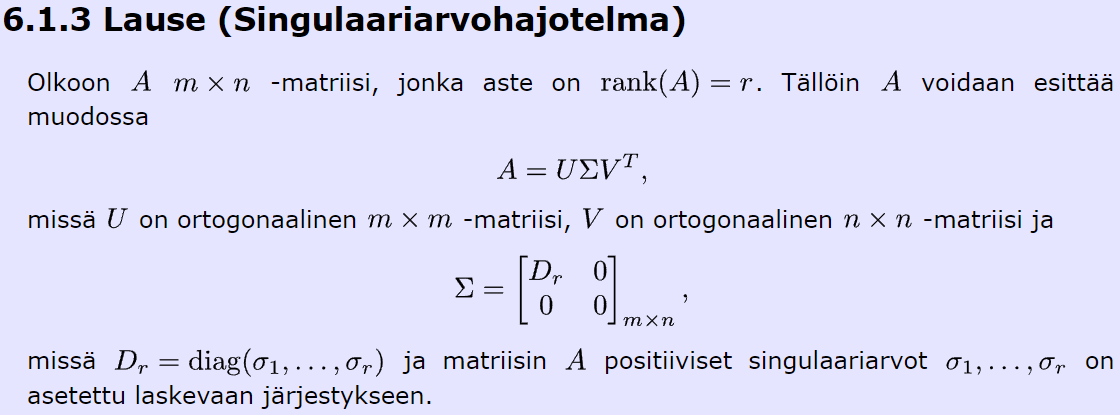

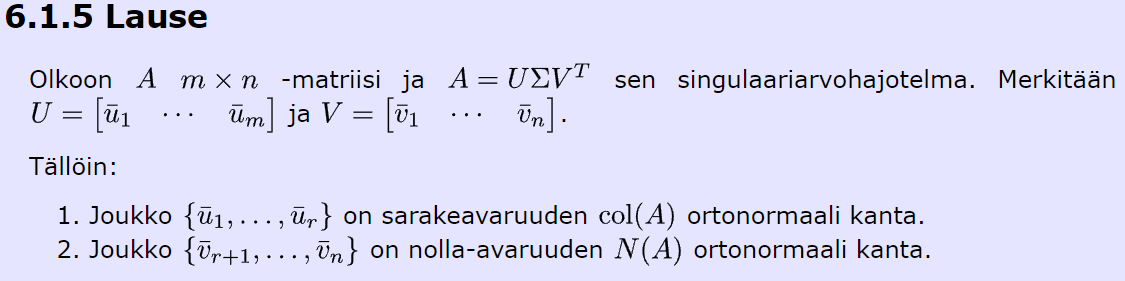

NumPyn $\, np.linalg.svd() \,$ palauttaa matriisin A singulaariarvohajotelman kolmen objektin muodossa. \
Sijoita ne muuttujiin U, S ja V.
- Huomaa, että S on vektori, joka sisältää ainoastaan matriisin A singulaariarvot. Se täytyy siis muuntaa matriisiksi $\mathbf{\Sigma}$ (ei kuitenkaan tehdä sitä tässä, kun sitä ei tehtävässä pyydetty).
- Huomaa, että matriisi V palautetaan valmiiksi transponoituna, joten sitä ei tarvitse matriisituloa laskiessa erikseen transponoida.

In [223]:
A = np.array([[1, 4, 2], [-1, 0, 2], [5, -1, -11], [0, 2, 2], [1, 1, -1]])

In [253]:
r = np.linalg.matrix_rank(A)

In [224]:
U, S, V = np.linalg.svd(A)

In [254]:
Null_Basis_A = V.T[:, r].reshape(-1, 1)

In [255]:
Null_Basis_A

array([[ 0.81649658],
       [-0.40824829],
       [ 0.40824829]])

- Huomaa, että matriisi V palautetaan transponoituna, joten jos se halutaan takaisin normaalimuotoon ($V^T$ $\rightarrow$ $V$), niin siitä pitää ottaa uudestaan transpoosi.
- Tämän jälkeen nolla-avaruuden $N(A)$ ortonormaali kanta voidaan poimia lauseiden **6.1.3** ja **6.1.5** mukaisesti sarakevektoreina.
- $V.T[:, \, 2]$ yksin palauttaa rivivektorin, joten jos se halutaan esittää sarakevektorina, se voidaan muokata sarakevektoriksi $reshape(-1, 1)$ -komennolla

Tarkistetaan tulos SciPyn $null\_space()$ -funktiolla, joka palauttaa matriisin $A$ nolla-avaruuden $N(A)$ ortonormaalin kannan.

In [246]:
scipy.linalg.null_space(A)

array([[ 0.81649658],
       [-0.40824829],
       [ 0.40824829]])

<br>

Matriisin $A$ sarakeavaruuden $C(A)$ ortonormaali kanta saadaan suoraan lauseiden **6.1.3** ja **6.1.5**  mukaisesti.

In [256]:
Col_Basis_A = U[:, 0:r]

In [258]:
Col_Basis_A

array([[ 0.15896914,  0.85890385],
       [ 0.17398385, -0.07378282],
       [-0.95315751,  0.17263385],
       [ 0.1664765 ,  0.39256051],
       [-0.0907456 ,  0.27006308]])